In [117]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

In [118]:
HOUSING_PATH_FULL='C:/Users/samys/PycharmProjects/HousingPrices/data/Melbourne_housing_FULL.csv'

def load_housing_data(housing_path=HOUSING_PATH_FULL):
    return pd.read_csv(housing_path)

In [119]:
loaded_data = load_housing_data()
loaded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [120]:
train_val_set = loaded_data.dropna(subset=['Price'])
final_test = loaded_data[loaded_data['Price'].isna()]

new_column_names = {'Lattitude': 'Latitude', 'Longtitude': 'Longitude'}
melb_data = train_val_set.rename(columns=new_column_names)

In [121]:
train_set, test_set = train_test_split(melb_data, test_size=0.2, random_state=42)
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21797 entries, 23012 to 30249
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21797 non-null  object 
 1   Address        21797 non-null  object 
 2   Rooms          21797 non-null  int64  
 3   Type           21797 non-null  object 
 4   Price          21797 non-null  float64
 5   Method         21797 non-null  object 
 6   SellerG        21797 non-null  object 
 7   Date           21797 non-null  object 
 8   Distance       21796 non-null  float64
 9   Postcode       21796 non-null  float64
 10  Bedroom2       16633 non-null  float64
 11  Bathroom       16627 non-null  float64
 12  Car            16324 non-null  float64
 13  Landsize       14353 non-null  float64
 14  BuildingArea   8535 non-null   float64
 15  YearBuilt      9677 non-null   float64
 16  CouncilArea    21794 non-null  object 
 17  Latitude       16796 non-null  float64
 18  Longitu

In [122]:
housing = train_set.copy()
numerical_features = train_set.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_set.select_dtypes(include=['object']).columns.tolist()

print("Numerical features:", numerical_features)
print("Categorical features:", categorical_features)


Numerical features: ['Rooms', 'Price', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'BuildingArea', 'YearBuilt', 'Latitude', 'Longitude', 'Propertycount']
Categorical features: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


array([[<Axes: title={'center': 'Rooms'}>,
        <Axes: title={'center': 'Price'}>,
        <Axes: title={'center': 'Distance'}>,
        <Axes: title={'center': 'Postcode'}>],
       [<Axes: title={'center': 'Bedroom2'}>,
        <Axes: title={'center': 'Bathroom'}>,
        <Axes: title={'center': 'Car'}>,
        <Axes: title={'center': 'Landsize'}>],
       [<Axes: title={'center': 'BuildingArea'}>,
        <Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': 'Latitude'}>,
        <Axes: title={'center': 'Longitude'}>],
       [<Axes: title={'center': 'Propertycount'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

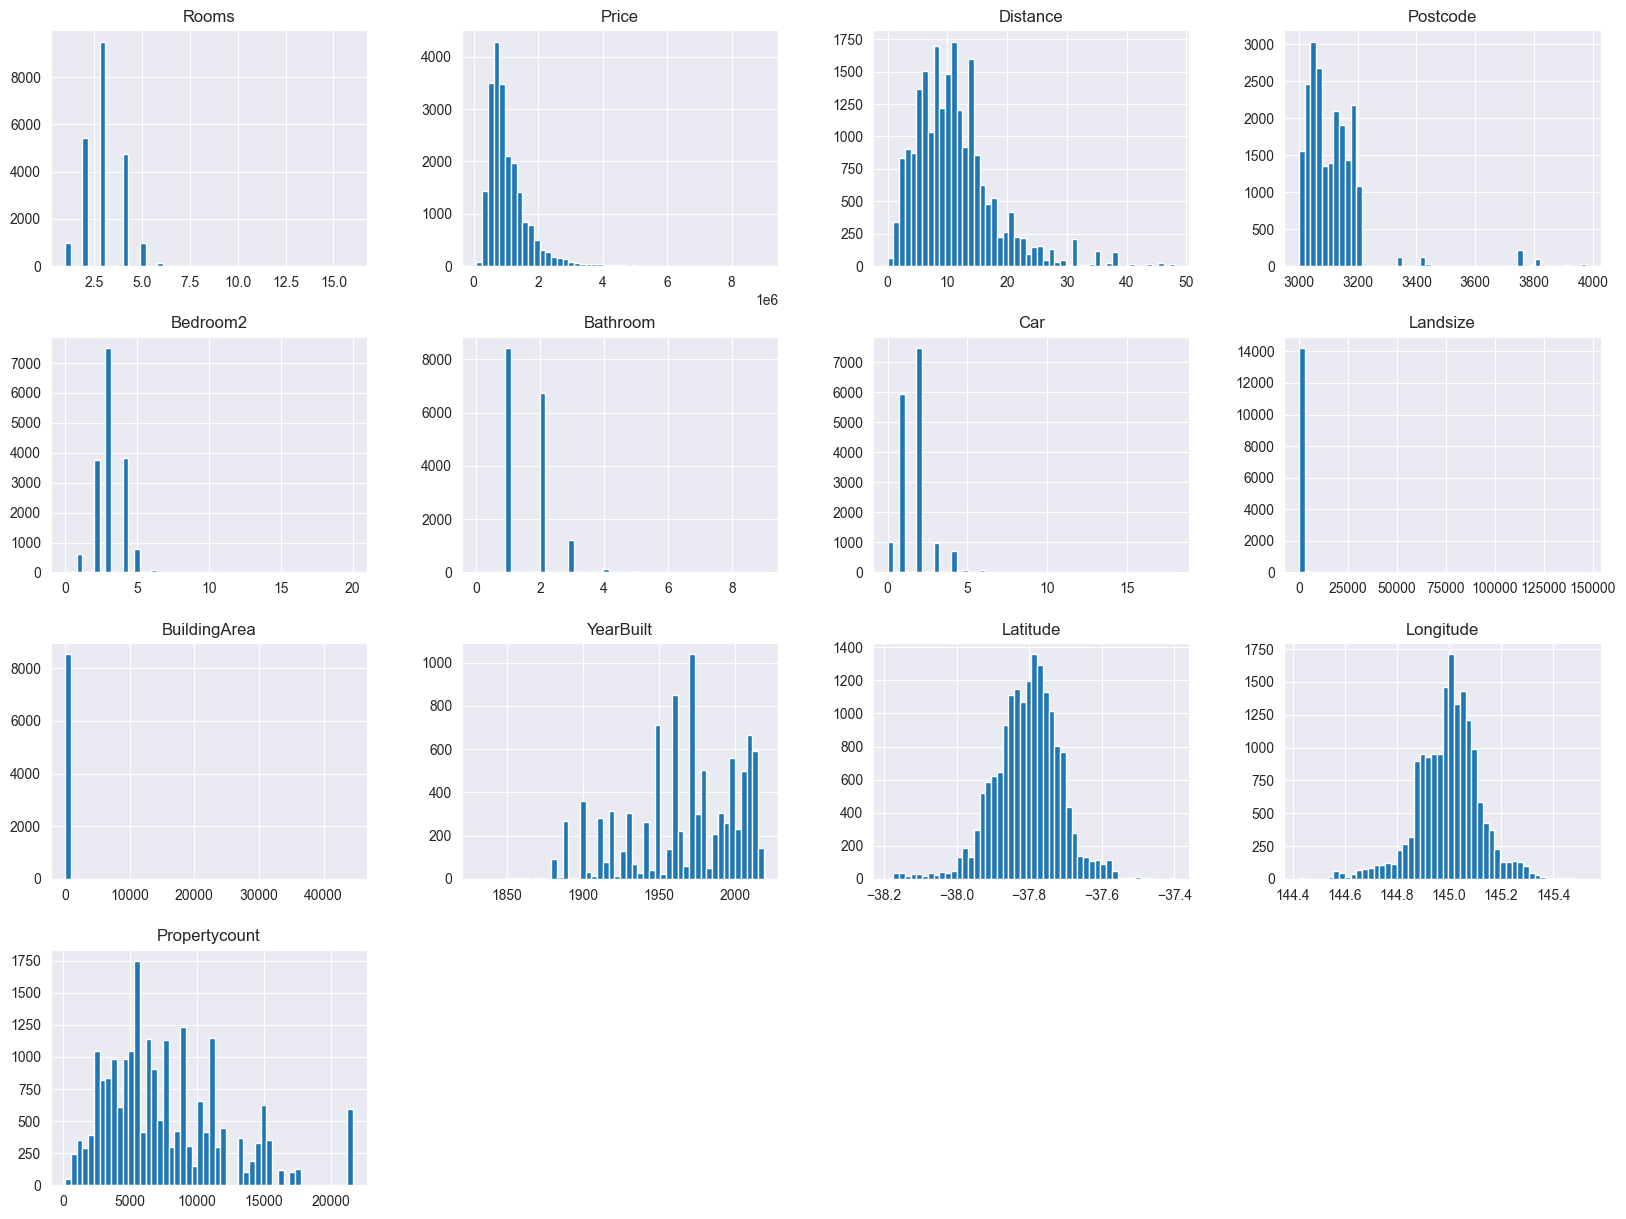

In [123]:
housing_num = housing[numerical_features]
housing.hist(bins=50, figsize=(20, 15))

In [124]:
corr_matrix = housing_num.corr()
corr_matrix["Price"].sort_values(ascending=False)

Price            1.000000
Rooms            0.467375
Bedroom2         0.433519
Bathroom         0.432131
Car              0.207149
Longitude        0.199245
BuildingArea     0.092678
Postcode         0.046193
Landsize         0.032255
Propertycount   -0.057901
Distance        -0.209202
Latitude        -0.216131
YearBuilt       -0.329857
Name: Price, dtype: float64

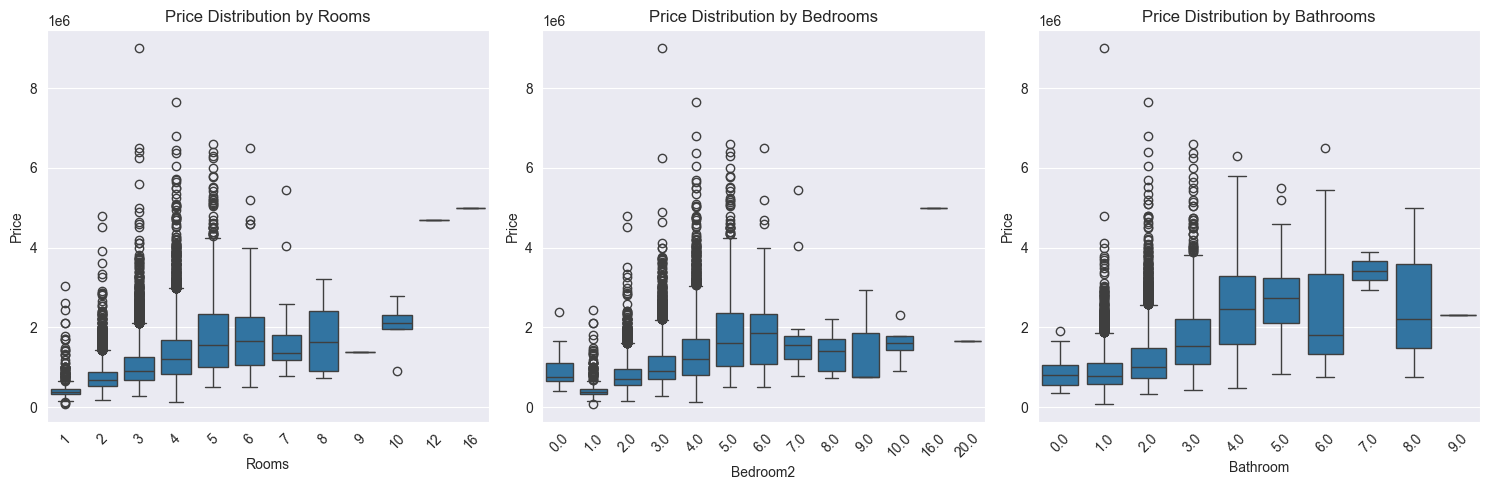

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Price vs Rooms
sns.boxplot(data=housing, x='Rooms', y='Price', ax=axes[0])
axes[0].set_title('Price Distribution by Rooms')
axes[0].tick_params(axis='x', rotation=45)

# Price vs Bedrooms
sns.boxplot(data=housing, x='Bedroom2', y='Price', ax=axes[1])
axes[1].set_title('Price Distribution by Bedrooms')
axes[1].tick_params(axis='x', rotation=45)

# Price vs Bathrooms
sns.boxplot(data=housing, x='Bathroom', y='Price', ax=axes[2])
axes[2].set_title('Price Distribution by Bathrooms')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()

In [126]:
housing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21797 entries, 23012 to 30249
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         21797 non-null  object 
 1   Address        21797 non-null  object 
 2   Rooms          21797 non-null  int64  
 3   Type           21797 non-null  object 
 4   Price          21797 non-null  float64
 5   Method         21797 non-null  object 
 6   SellerG        21797 non-null  object 
 7   Date           21797 non-null  object 
 8   Distance       21796 non-null  float64
 9   Postcode       21796 non-null  float64
 10  Bedroom2       16633 non-null  float64
 11  Bathroom       16627 non-null  float64
 12  Car            16324 non-null  float64
 13  Landsize       14353 non-null  float64
 14  BuildingArea   8535 non-null   float64
 15  YearBuilt      9677 non-null   float64
 16  CouncilArea    21794 non-null  object 
 17  Latitude       16796 non-null  float64
 18  Longitu

In [127]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Удаляем колонки с большим количеством пропусков
drop_cols = ["BuildingArea", "YearBuilt", "Postcode"]
housing_clean = housing.drop(columns=drop_cols)

# Удаляем строки с пропусками в важных признаках
important_dropna_cols = ["Distance", "CouncilArea", "Regionname", "Latitude", "Longitude"]
housing_clean = housing_clean.dropna(subset=important_dropna_cols)

# Колонки для импутации
median_impute_cols = ["Bedroom2", "Bathroom", "Car", "Landsize"]
mean_impute_cols = ["Propertycount"]

In [128]:
from sklearn.preprocessing import OneHotEncoder

# Создаём имьютеры
median_imputer = SimpleImputer(strategy="median")
mean_imputer = SimpleImputer(strategy="mean")

# Объединяем их в ColumnTransformer
imputer_transform = ColumnTransformer(transformers=[
    ("median_imputer", median_imputer, median_impute_cols),
    ("mean_imputer", mean_imputer, mean_impute_cols)
],
    remainder="passthrough",
    verbose_feature_names_out=False)  # остальные признаки остаются как есть

numerical_cols = housing_clean.select_dtypes(include=['int64', 'float64']).columns.drop('Price').tolist()
categorical_cols = housing_clean.drop(columns=numerical_cols + ['Price']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

numeric_transformer = Pipeline(steps=[
    ('imputer_transform', imputer_transform),  # замена NaN на среднее
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'
                              # , sparse_output=False
))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


Numerical columns: ['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Car', 'Landsize', 'Latitude', 'Longitude', 'Propertycount']
Categorical columns: ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'Date', 'CouncilArea', 'Regionname']


In [129]:
X_train = housing_clean.drop(columns=["Price"])
Y_train = housing_clean["Price"]

# from sklearn import set_config
# set_config(transform_output="pandas")

X_train_transformed = pipeline.fit_transform(X_train)

# X_prepared_df = pd.DataFrame(X_prepared)
# X_prepared_df.info()

In [131]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

test_set_clean = test_set.drop(columns=drop_cols)
test_set_clean = test_set_clean.dropna(subset=important_dropna_cols)


X_test = test_set_clean.drop(columns=["Price"])
Y_test = test_set_clean["Price"]

X_test_transformed = pipeline.transform(test_set_clean)


In [132]:
# Создаем модель линейной регрессии
model = LinearRegression()

# Обучаем модель на обучающих данных
model.fit(X_train_transformed, Y_train)

# Делаем предсказания на тестовых данных
Y_pred = model.predict(X_test_transformed)


In [133]:
# Оценка ошибки модели
mae = mean_absolute_error(Y_test, Y_pred)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred)

# Выводим результаты
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R²: {r2}")

Mean Absolute Error (MAE): 533114.1894451326
Mean Squared Error (MSE): 533528985972.4239
Root Mean Squared Error (RMSE): 730430.6852620746
R²: -0.24993983764540495
